### Columns
- Booking_ID: 각 예약의 고유 식별자
- no_of_adults: 성인의 수
- no_of_children: 어린이의 수
- no_of_weekend_nights: 토요일 또는 일요일 밤에 호텔에 머무르거나 예약한 밤의 수
- no_of_week_nights: 월요일부터 금요일까지 호텔에 머무르거나 예약한 밤의 수
- type_of_meal_plan: 고객이 예약한 식사 계획 유형 -> 범주형
- required_car_parking_space: 고객이 차량 주차 공간이 필요한지 여부 (0 - 아니오, 1- 예) -> 범주형
- room_type_reserved: 고객이 예약한 방 유형. 값은 INN 호텔에 의해 암호화됨. -> 범주형
- lead_time: 예약일과 도착일 사이의 일 수
- arrival_year: 도착 날짜의 연도
- arrival_month: 도착 날짜의 월
- arrival_date: 월의 날짜
- market_segment_type: 예약처 유형 -> 범주형
- repeated_guest: 고객이 반복 고객인지 여부 (0 - 아니오, 1- 예) -> 범주형
- no_of_previous_cancellations: 현재 예약 이전에 고객이 취소한 이전 예약의 수
- no_of_previous_bookings_not_canceled: 현재 예약 이전에 취소되지 않은 이전 예약의 수
- avg_price_per_room: 예약당 평균 객실 가격; 객실 가격은 동적입니다. (유로)
- no_of_special_requests: 고객이 요청한 특별 요청의 총 수 (높은 층, 방에서의 전망 등)
- booking_status: 예약이 취소되었는지 여부

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
train = pd.read_csv("C:\\Datamining\\train.csv")
train

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN29581,2,0,1,3,Meal Plan 1,0,Room_Type 1,200,2018,8,29,Online,0,0,0,90.95,0,Canceled
1,INN06326,2,0,1,3,Meal Plan 1,0,Room_Type 1,79,2018,3,24,Online,0,0,0,90.95,1,Canceled
2,INN33900,2,0,1,4,Meal Plan 1,0,Room_Type 4,78,2018,4,6,Online,0,0,0,99.45,1,Not_Canceled
3,INN00721,2,0,2,0,Meal Plan 1,0,Room_Type 1,61,2017,10,4,Offline,0,0,0,91.00,0,Not_Canceled
4,INN22121,2,1,0,4,Meal Plan 1,0,Room_Type 1,201,2018,11,1,Online,0,0,0,82.28,3,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25387,INN16851,2,0,2,2,Meal Plan 1,0,Room_Type 1,43,2017,12,26,Offline,0,0,0,55.00,2,Not_Canceled
25388,INN06266,1,0,0,2,Meal Plan 2,0,Room_Type 1,102,2017,10,16,Online,0,0,0,80.00,0,Canceled
25389,INN11285,2,0,0,2,Meal Plan 1,0,Room_Type 1,5,2018,5,24,Corporate,0,0,0,110.00,1,Not_Canceled
25390,INN00861,2,0,0,3,Meal Plan 1,0,Room_Type 1,213,2018,6,7,Online,0,0,0,130.00,0,Canceled


## EDA

### 데이터 확인

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25392 entries, 0 to 25391
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            25392 non-null  object 
 1   no_of_adults                          25392 non-null  int64  
 2   no_of_children                        25392 non-null  int64  
 3   no_of_weekend_nights                  25392 non-null  int64  
 4   no_of_week_nights                     25392 non-null  int64  
 5   type_of_meal_plan                     25392 non-null  object 
 6   required_car_parking_space            25392 non-null  int64  
 7   room_type_reserved                    25392 non-null  object 
 8   lead_time                             25392 non-null  int64  
 9   arrival_year                          25392 non-null  int64  
 10  arrival_month                         25392 non-null  int64  
 11  arrival_date   

In [6]:
train.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [12]:
train.describe(include = 'all')

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,weather,child,lead_term
count,25392,25392.000000,25392.000000,25392.000000,25392.000000,25392,25392.000000,25392,25392.000000,25392.000000,...,25392,25392.000000,25392.000000,25392.000000,25392.000000,25392.000000,25392,25392,25392.000000,25392
unique,25392,NaN,NaN,NaN,NaN,4,NaN,7,NaN,NaN,...,5,NaN,NaN,NaN,NaN,NaN,2,4,NaN,2
top,INN29581,NaN,NaN,NaN,NaN,Meal Plan 1,NaN,Room_Type 1,NaN,NaN,...,Online,NaN,NaN,NaN,NaN,NaN,Not_Canceled,Autumn,NaN,S
freq,1,NaN,NaN,NaN,NaN,19492,NaN,19684,NaN,NaN,...,16210,NaN,NaN,NaN,NaN,NaN,17114,9072,NaN,16956
mean,NaN,1.845069,0.105151,0.810137,2.201323,NaN,0.031348,NaN,85.411508,2017.819471,...,NaN,0.025165,0.023905,0.156191,103.485770,0.618305,NaN,NaN,0.074433,NaN
std,NaN,0.519044,0.401900,0.867761,1.396599,NaN,0.174261,NaN,85.745937,0.384635,...,NaN,0.156630,0.378652,1.818933,35.067053,0.786555,NaN,NaN,0.262479,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,2017.000000,...,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN
25%,NaN,2.000000,0.000000,0.000000,1.000000,NaN,0.000000,NaN,17.000000,2018.000000,...,NaN,0.000000,0.000000,0.000000,80.750000,0.000000,NaN,NaN,0.000000,NaN
50%,NaN,2.000000,0.000000,1.000000,2.000000,NaN,0.000000,NaN,58.000000,2018.000000,...,NaN,0.000000,0.000000,0.000000,99.865000,0.000000,NaN,NaN,0.000000,NaN
75%,NaN,2.000000,0.000000,2.000000,3.000000,NaN,0.000000,NaN,127.000000,2018.000000,...,NaN,0.000000,0.000000,0.000000,120.150000,1.000000,NaN,NaN,0.000000,NaN


In [13]:
list(train.columns)

['Booking_ID',
 'no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'type_of_meal_plan',
 'required_car_parking_space',
 'room_type_reserved',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'market_segment_type',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests',
 'booking_status',
 'weather',
 'child',
 'lead_term']

In [14]:
train['no_of_special_requests'].value_counts()

0    13869
1     7951
2     3036
3      474
4       55
5        7
Name: no_of_special_requests, dtype: int64

In [15]:
train['arrival_year'].value_counts() # 범주형으로

2018    20808
2017     4584
Name: arrival_year, dtype: int64

In [16]:
categorical_feature = ['type_of_meal_plan','required_car_parking_space','room_type_reserved','market_segment_type','repeated_guest','arrival_year','booking_status']

In [17]:
categorical_feature

['type_of_meal_plan',
 'required_car_parking_space',
 'room_type_reserved',
 'market_segment_type',
 'repeated_guest',
 'arrival_year',
 'booking_status']

In [18]:
numeric_feature = train.select_dtypes(include=np.number).columns.tolist()
numeric_feature.remove('repeated_guest')
numeric_feature.remove('required_car_parking_space')
numeric_feature.remove('arrival_year')
numeric_feature

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'lead_time',
 'arrival_month',
 'arrival_date',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests',
 'child']

### 결측치 및 이상치 확인

In [19]:
len(train[train.duplicated()]) # 중복 데이터 없음

0

In [20]:
len(test[test.duplicated()])

NameError: name 'test' is not defined

C:\Users\KWAK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KWAK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KWAK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KWAK\anaconda3\lib\site-p

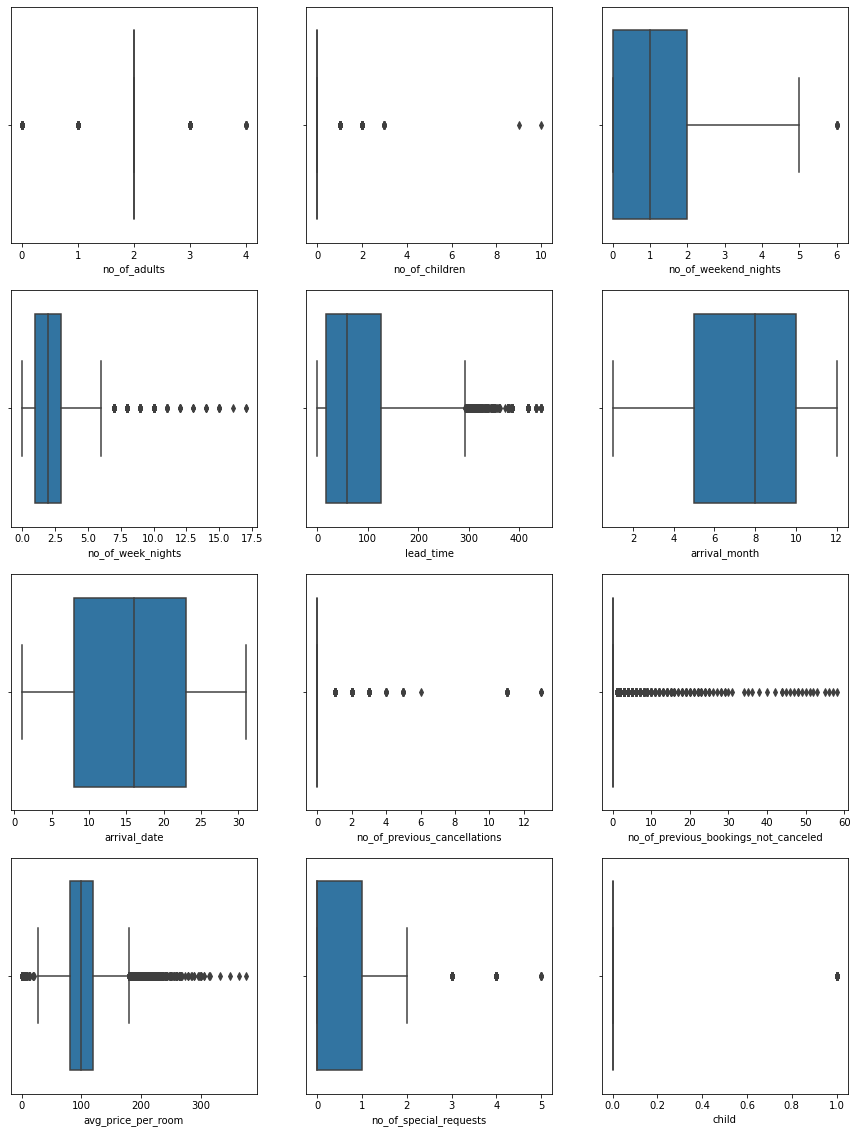

In [21]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))

for row in range(4):
    for col in range(3):
        idx = row * 3 + col
        ax = axes[row][col]
        if idx < len(numeric_feature):
            value = numeric_feature[idx]
            sns.boxplot(train[value],ax=ax)

plt.show()

In [22]:
lst = []

for i in range(len(train)):
    if train.iloc[i,2] == 9 or train.iloc[i,2] == 10:
        lst.append(i)
        
print(lst)

[6135, 8849]


In [23]:
train = train.drop([6135, 8849],axis=0) # 이상치 9, 10 제거

In [24]:
train['no_of_children'].value_counts()

0    23502
1     1137
2      739
3       12
Name: no_of_children, dtype: int64

In [25]:
train.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'weather', 'child', 'lead_term'],
      dtype='object')

### 데이터 분포 확인

#### 독립변수 (범주형)

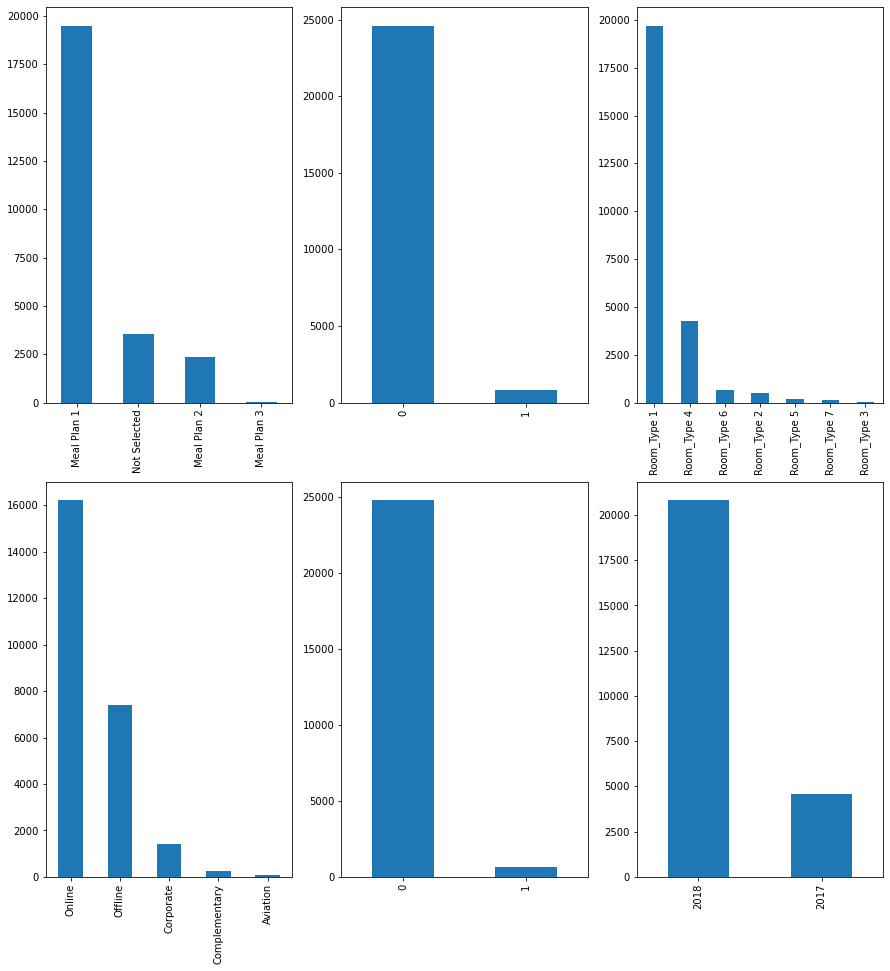

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 16))

for row in range(2):
    for col in range(3):
        idx = row * 3 + col
        
        if idx < len(categorical_feature[:-1]):
            ax = axes[row][col]
            value = categorical_feature[idx]
            train[value].value_counts().plot(kind='bar',ax=ax)
            
plt.show()

#### 독립변수(수치형)

C:\Users\KWAK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\KWAK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\KWAK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

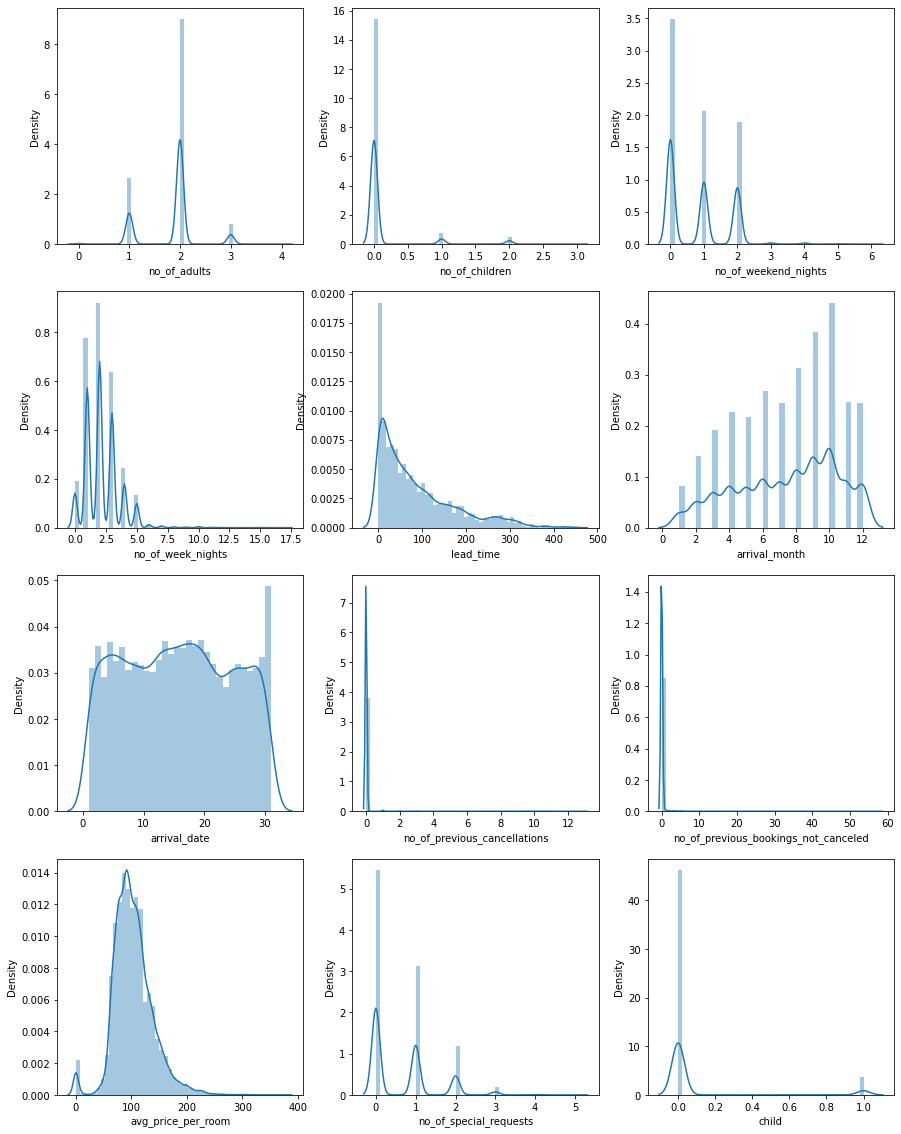

In [27]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))

for row in range(4):
    for col in range(3):
        idx = row * 3 + col
        
        if idx < len(numeric_feature):
            ax = axes[row][col]
            value = numeric_feature[idx]
            sns.distplot(train[value],ax=ax)
            
plt.show()

#### 종속변수

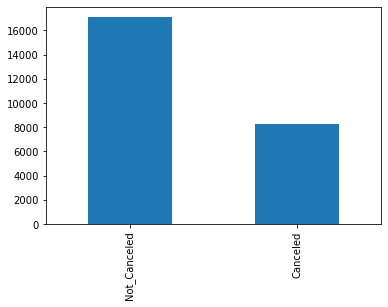

In [28]:
train['booking_status'].value_counts().plot(kind='bar') # 종속변수(booking status) 분포 확인
plt.show()

### 변수 간 상관관계 확인

In [29]:
train.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'weather', 'child', 'lead_term'],
      dtype='object')

In [30]:
# 변수들 간 상관관계 히트맵
corr_var = ['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']

corr = train[corr_var].corr()

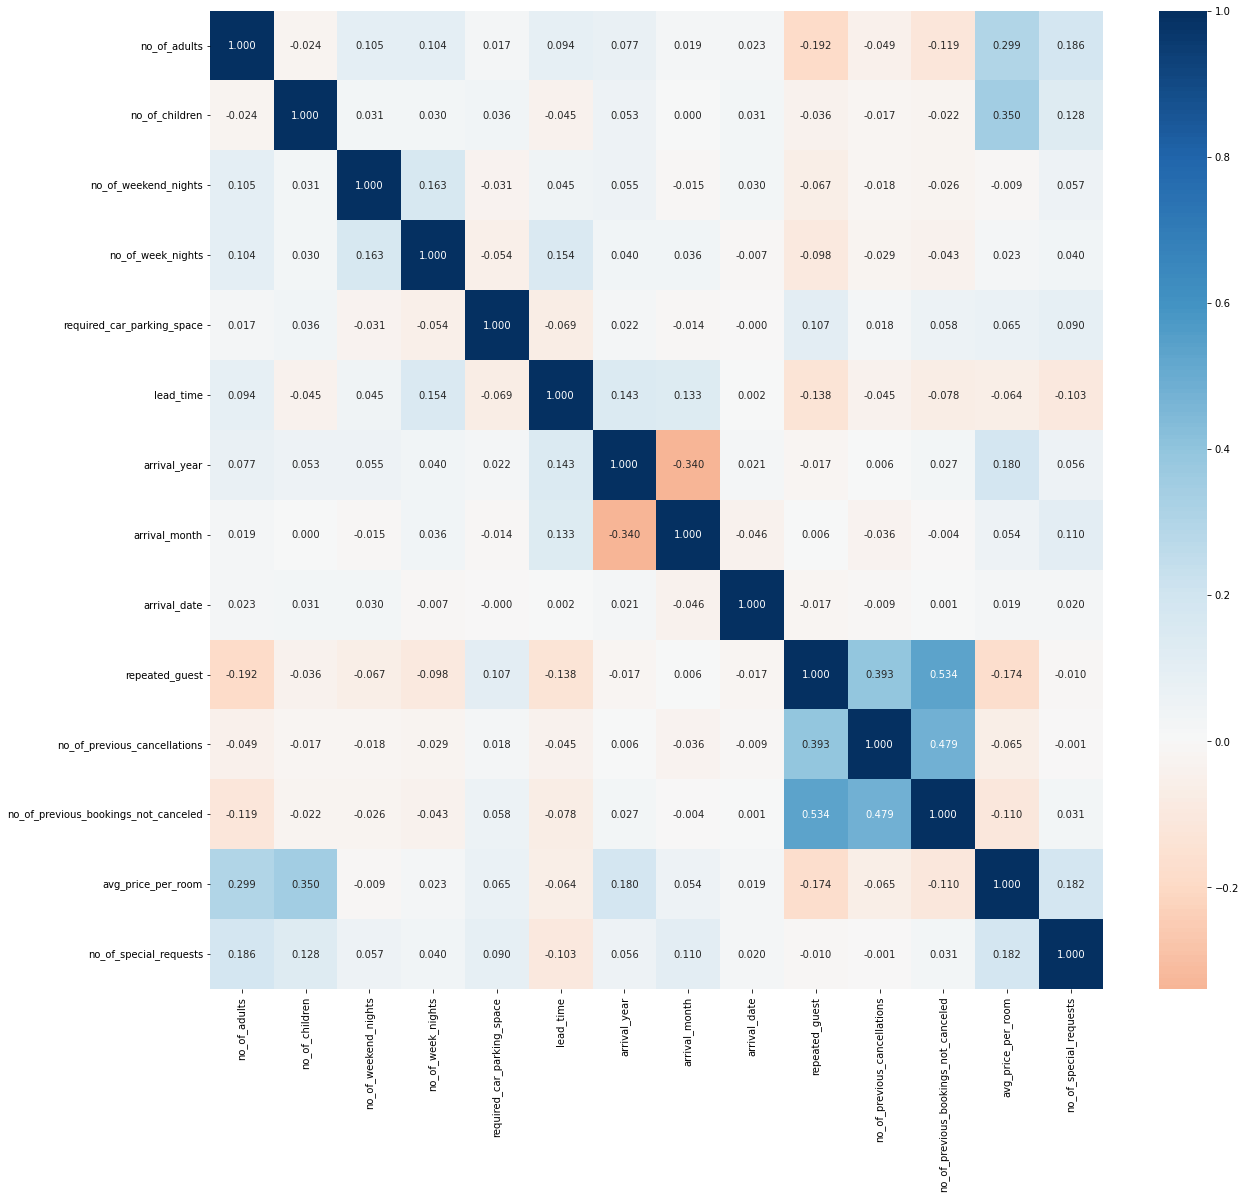

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(20,18)
sns.heatmap(corr, annot=True, fmt=".3f", cmap="RdBu", center=0, ax=ax)

plt.show()

## 데이터 전처리

In [32]:
train

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,weather,child,lead_term
0,INN29581,2,0,1,3,Meal Plan 1,0,Room_Type 1,200,2018,...,Online,0,0,0,90.95,0,Canceled,Summer,0,L
1,INN06326,2,0,1,3,Meal Plan 1,0,Room_Type 1,79,2018,...,Online,0,0,0,90.95,1,Canceled,Spring,0,S
2,INN33900,2,0,1,4,Meal Plan 1,0,Room_Type 4,78,2018,...,Online,0,0,0,99.45,1,Not_Canceled,Spring,0,S
3,INN00721,2,0,2,0,Meal Plan 1,0,Room_Type 1,61,2017,...,Offline,0,0,0,91.00,0,Not_Canceled,Autumn,0,S
4,INN22121,2,1,0,4,Meal Plan 1,0,Room_Type 1,201,2018,...,Online,0,0,0,82.28,3,Not_Canceled,Autumn,1,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25387,INN16851,2,0,2,2,Meal Plan 1,0,Room_Type 1,43,2017,...,Offline,0,0,0,55.00,2,Not_Canceled,Winter,0,S
25388,INN06266,1,0,0,2,Meal Plan 2,0,Room_Type 1,102,2017,...,Online,0,0,0,80.00,0,Canceled,Autumn,0,L
25389,INN11285,2,0,0,2,Meal Plan 1,0,Room_Type 1,5,2018,...,Corporate,0,0,0,110.00,1,Not_Canceled,Spring,0,S
25390,INN00861,2,0,0,3,Meal Plan 1,0,Room_Type 1,213,2018,...,Online,0,0,0,130.00,0,Canceled,Summer,0,L


#### 추가변수 생성

In [33]:
# 계절변수

weathers = []

for month in train['arrival_month']:
    if 3 <= month <= 5:
        weathers.append('Spring')
    elif 6 <= month <= 8:
        weathers.append('Summer')
    elif 9 <= month <= 11:
        weathers.append('Autumn')
    elif month <= 2 or month == 12:
        weathers.append('Winter')

train['weather'] = weathers
categorical_feature.append('weather')

In [34]:
# 어린이 포함 유무 변수

child_lst = []

for child in train['no_of_children']:
    if child == 0:
        child_lst.append(0)
    elif child != 0:
        child_lst.append(1)
        
train['child'] = child_lst
categorical_feature.append('child')

In [35]:
# lead_time 장/단 판단 변수

lead_term_lst = []

for time in train['lead_time']:
    if time < 100:
        lead_term_lst.append('S')
    else:
        lead_term_lst.append('L')
        
train['lead_term'] = lead_term_lst
categorical_feature.append('lead_term')

In [36]:
print(train.skew()) 

no_of_adults                            -0.338079
no_of_children                           3.963868
no_of_weekend_nights                     0.700438
no_of_week_nights                        1.505033
required_car_parking_space               5.378919
lead_time                                1.285677
arrival_year                            -1.661514
arrival_month                           -0.348819
arrival_date                             0.025245
repeated_guest                           6.063342
no_of_previous_cancellations            24.852717
no_of_previous_bookings_not_canceled    19.567480
avg_price_per_room                       0.629260
no_of_special_requests                   1.156776
child                                    3.244945
dtype: float64


C:\Users\KWAK\AppData\Local\Temp\ipykernel_27800\874289694.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(train.skew())


In [37]:
categorical_feature.remove('booking_status')
categorical_feature.remove('child') 

In [38]:
categorical_feature

['type_of_meal_plan',
 'required_car_parking_space',
 'room_type_reserved',
 'market_segment_type',
 'repeated_guest',
 'arrival_year',
 'weather',
 'lead_term']

In [39]:
train_dummy = pd.get_dummies(train, columns = categorical_feature)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [41]:
print(train_dummy.skew())

no_of_adults                             -0.338079
no_of_children                            3.963868
no_of_weekend_nights                      0.700438
no_of_week_nights                         1.505033
lead_time                                 1.285677
arrival_month                            -0.348819
arrival_date                              0.025245
no_of_previous_cancellations             24.852717
no_of_previous_bookings_not_canceled     19.567480
avg_price_per_room                        0.629260
no_of_special_requests                    1.156776
child                                     3.244945
type_of_meal_plan_Meal Plan 1            -1.267399
type_of_meal_plan_Meal Plan 2             2.821715
type_of_meal_plan_Meal Plan 3           112.665433
type_of_meal_plan_Not Selected            2.072585
required_car_parking_space_0             -5.378919
required_car_parking_space_1              5.378919
room_type_reserved_Room_Type 1           -1.318739
room_type_reserved_Room_Type 2 

C:\Users\KWAK\AppData\Local\Temp\ipykernel_27800\1822471276.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(train_dummy.skew())


In [42]:
skew_lst = ['no_of_children','no_of_previous_cancellations','no_of_previous_bookings_not_canceled']

for i in skew_lst:
    train_dummy[i] = np.log1p(train_dummy[i])
    
print(train_dummy.skew())

no_of_adults                             -0.338079
no_of_children                            3.579329
no_of_weekend_nights                      0.700438
no_of_week_nights                         1.505033
lead_time                                 1.285677
arrival_month                            -0.348819
arrival_date                              0.025245
no_of_previous_cancellations             14.636663
no_of_previous_bookings_not_canceled      8.998486
avg_price_per_room                        0.629260
no_of_special_requests                    1.156776
child                                     3.244945
type_of_meal_plan_Meal Plan 1            -1.267399
type_of_meal_plan_Meal Plan 2             2.821715
type_of_meal_plan_Meal Plan 3           112.665433
type_of_meal_plan_Not Selected            2.072585
required_car_parking_space_0             -5.378919
required_car_parking_space_1              5.378919
room_type_reserved_Room_Type 1           -1.318739
room_type_reserved_Room_Type 2 

C:\Users\KWAK\AppData\Local\Temp\ipykernel_27800\1847399797.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(train_dummy.skew())


### 변수 선택 

In [43]:
train_dummy = train_dummy.replace({'Canceled':1, 'Not_Canceled':0})

In [44]:
corr = train_dummy.corr()

In [45]:
y_corr = corr[["booking_status"]].sort_values(by="booking_status",ascending=False)[1:]
y_corr

,booking_status
lead_time,0.432319
lead_term_L,0.383441
arrival_year_2018,0.175469
avg_price_per_room,0.145567
weather_Summer,0.113343
market_segment_type_Online,0.107953
repeated_guest_0,0.106927
no_of_adults,0.091348
required_car_parking_space_0,0.090413
no_of_week_nights,0.090301


종속변수와의 상관계수가 절댓값 0.1보다 큰 변수만 선택

In [46]:
selected_lst = ['lead_time','lead_term_L','arrival_year_2018','avg_price_per_room','weather_Summer','market_segment_type_Online','repeated_guest_0'
               ,'no_of_adults','required_car_parking_space_0','no_of_week_nights','lead_term_S','no_of_special_requests','arrival_year_2017','weather_Winter','market_segment_type_Corporate'
               ,'repeated_guest_1','required_car_parking_space_1']

In [47]:
selected_lst2 = ['lead_time','lead_term_L','arrival_year_2018','avg_price_per_room','weather_Summer','market_segment_type_Online','repeated_guest_0'
               ,'no_of_adults','required_car_parking_space_0','no_of_week_nights','type_of_meal_plan_Meal Plan 2','lead_term_S','no_of_special_requests','arrival_year_2017','weather_Winter','market_segment_type_Corporate'
               ,'repeated_guest_1','required_car_parking_space_1','no_ofs_previous_bookings_not_canceled']

In [48]:
len(selected_lst2)

19

In [59]:
print(selected_lst)
print("\nselected_lst 원소의 개수 : ",len(selected_lst))

['lead_time', 'lead_term_L', 'arrival_year_2018', 'avg_price_per_room', 'weather_Summer', 'market_segment_type_Online', 'repeated_guest_0', 'no_of_adults', 'required_car_parking_space_0', 'no_of_week_nights', 'lead_term_S', 'no_of_special_requests', 'arrival_year_2017', 'weather_Winter', 'market_segment_type_Corporate', 'repeated_guest_1', 'required_car_parking_space_1']

selected_lst 원소의 개수 :  17


In [60]:
print(selected_lst2)
print("\nselected_lst2 원소의 개수 : ",len(selected_lst2))

['lead_time', 'lead_term_L', 'arrival_year_2018', 'avg_price_per_room', 'weather_Summer', 'market_segment_type_Online', 'repeated_guest_0', 'no_of_adults', 'required_car_parking_space_0', 'no_of_week_nights', 'type_of_meal_plan_Meal Plan 2', 'lead_term_S', 'no_of_special_requests', 'arrival_year_2017', 'weather_Winter', 'market_segment_type_Corporate', 'repeated_guest_1', 'required_car_parking_space_1', 'no_of_previous_bookings_not_canceled']

selected_lst2 원소의 개수 :  19


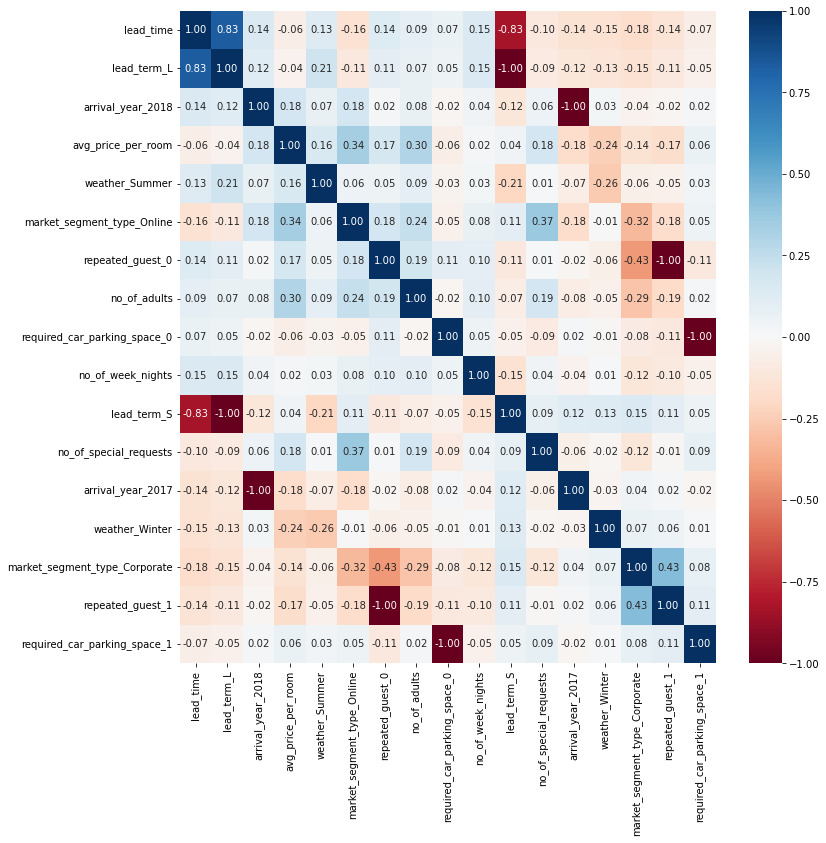

In [61]:
corr = train_dummy[selected_lst].corr()

fig, ax = plt.subplots()
fig.set_size_inches(12,12)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdBu", center=0, ax=ax)

plt.show()

변수 간 상관관계가 큰 것 중 하나씩 제거

In [62]:
selected_lst = ['lead_time','repeated_guest_0','avg_price_per_room','weather_Summer','market_segment_type_Online','market_segment_type_Corporate','no_of_special_requests','weather_Winter','arrival_year_2017','no_of_adults','no_of_week_nights','required_car_parking_space_0']

len(selected_lst)

12

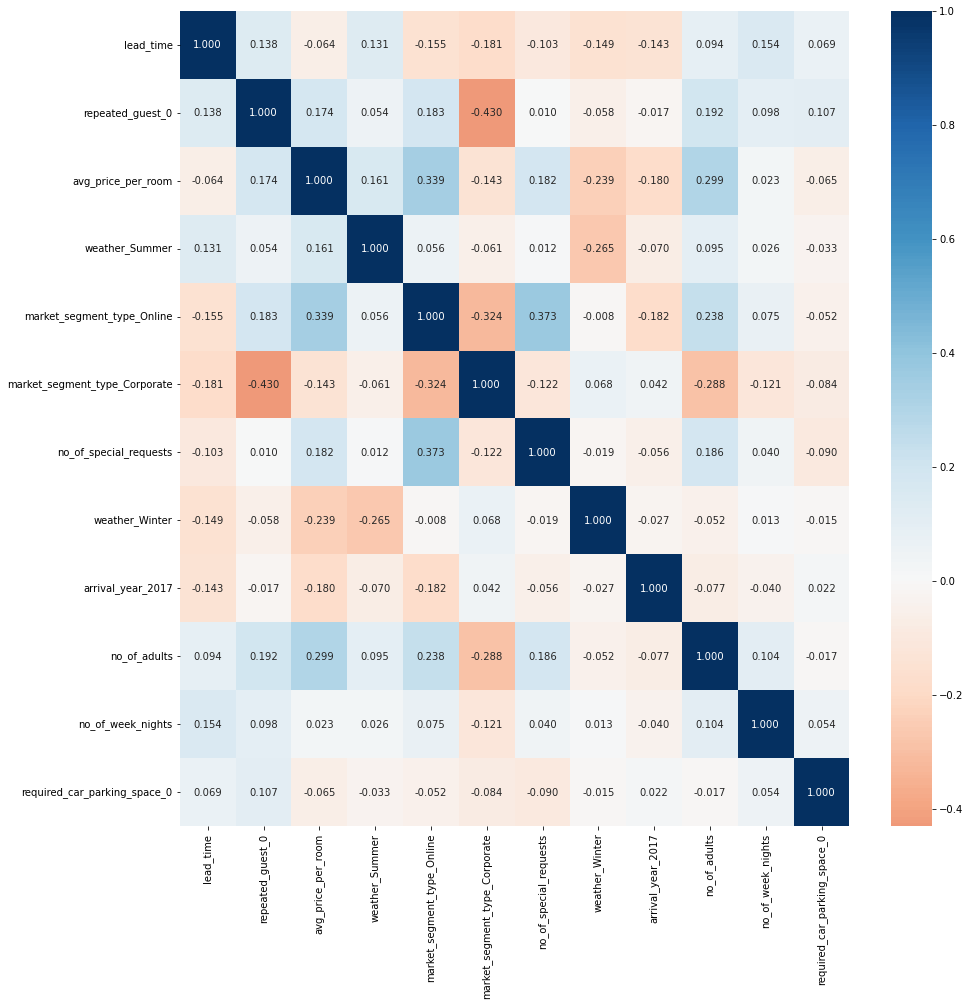

In [63]:
corr = train_dummy[selected_lst].corr()  # 제거 후 변수들 간 상관관계

fig, ax = plt.subplots()
fig.set_size_inches(15,15)
sns.heatmap(corr, annot=True, fmt=".3f", cmap="RdBu", center=0, ax=ax)

plt.show()

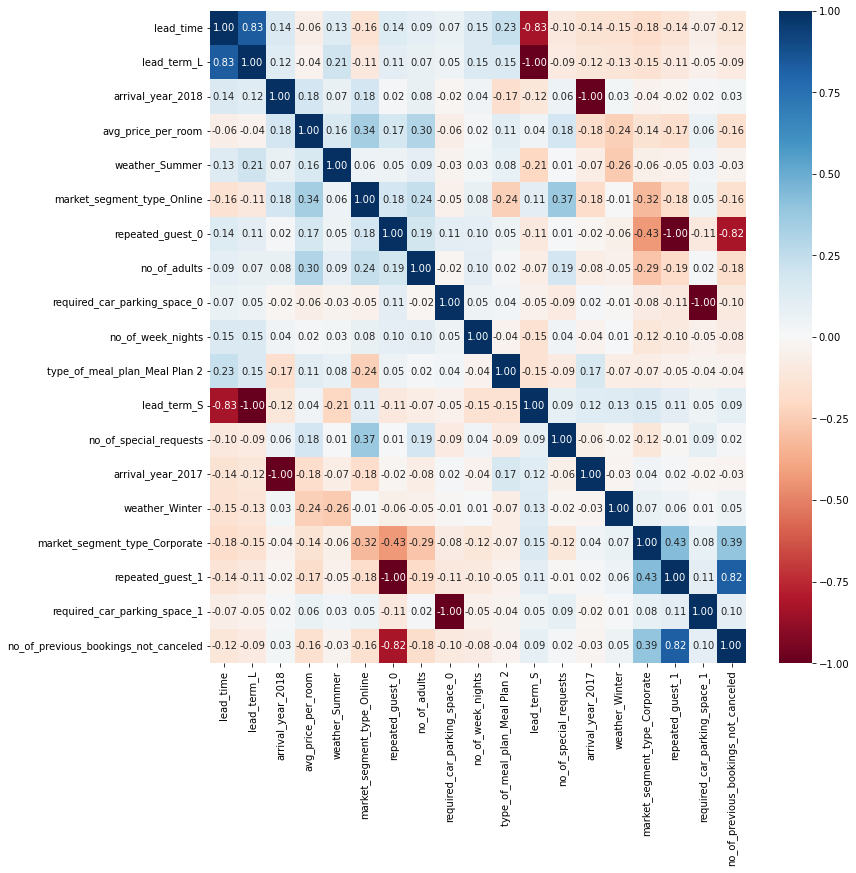

In [64]:
corr = train_dummy[selected_lst2].corr()

fig, ax = plt.subplots()
fig.set_size_inches(12,12)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdBu", center=0, ax=ax)

plt.show()

In [65]:
selected_lst2 = ['lead_time','avg_price_per_room','weather_Summer','market_segment_type_Online'
               ,'no_of_adults','required_car_parking_space_0','no_of_week_nights','type_of_meal_plan_Meal Plan 2','no_of_special_requests','arrival_year_2017','weather_Winter','market_segment_type_Corporate'
               ,'repeated_guest_1','no_of_previous_bookings_not_canceled']

In [66]:
len(selected_lst2)

14

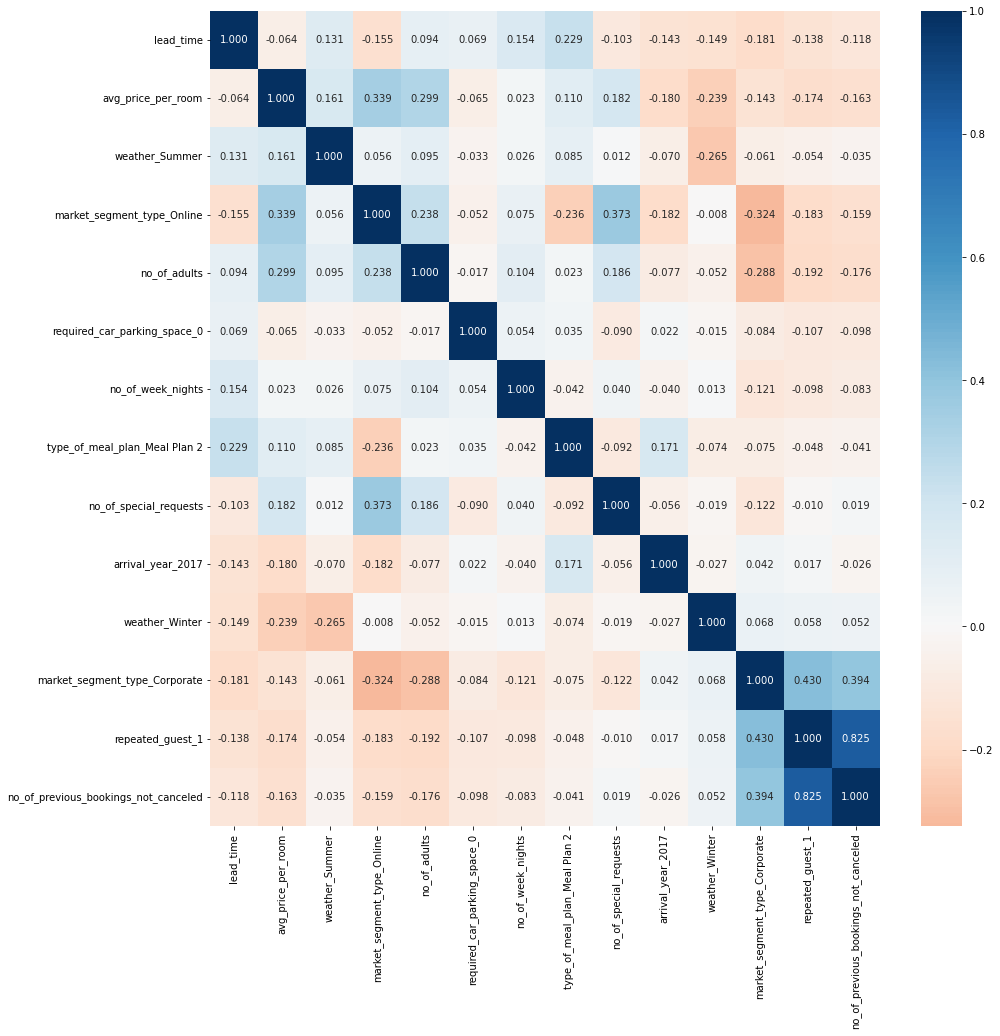

In [67]:
corr = train_dummy[selected_lst2].corr()

fig, ax = plt.subplots()
fig.set_size_inches(15,15)
sns.heatmap(corr, annot=True, fmt=".3f", cmap="RdBu", center=0, ax=ax)

plt.show()

### 모델별 정확도 비교 (파라미터 : 디폴트)

In [69]:
import warnings
warnings.filterwarnings(action='ignore')

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

# Decision Tree 학습/예측/평가
X_train, X_test, y_train, y_test = train_test_split(X,y)
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
dt_pred = dt_model.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# GaussianNB 학습/예측/평가
nb_model = GaussianNB()
nb_model.fit(X_train , y_train)
nb_pred = nb_model.predict(X_test)
print('GaussianNB 정확도: {0:.4f}'.format(accuracy_score(y_test, nb_pred)))

# LogisticRegression 학습/예측/평가
lr_model = LogisticRegression()
lr_model.fit(X_train , y_train)
lr_pred = lr_model.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

# multi-layer perceptron 학습/예측/평가
mlp_model = MLPClassifier()
mlp_model.fit(X_train , y_train)
mlp_pred = mlp_model.predict(X_test)
print('MLPClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, mlp_pred)))

# NearestNeighbors 학습/예측/평가
knn_model = KNeighborsClassifier()
knn_model.fit(X_train , y_train)
knn_pred = knn_model.predict(X_test)
print('NearestNeighbors 정확도: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))

DecisionTreeClassifier 정확도: 0.8592
GaussianNB 정확도: 0.5244
LogisticRegression 정확도: 0.8069
MLPClassifier 정확도: 0.7955
NearestNeighbors 정확도: 0.8129


### 의사결정트리 

In [79]:
variables = list(train_dummy.columns)
variables.remove('Booking_ID')
variables.remove('booking_status')

In [117]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.model_selection as ms

# 트레인 데이터와 테스트 데이터 7:3 비율로 분할

X = train_dummy[selected_lst2]
y = train_dummy[['booking_status']]

X_train, X_test, y_train, y_test = ms.train_test_split(X, y, 
                                                      test_size = 0.3, random_state = 100)
# DT 객체 생성 및 훈련
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)

# 예측값 저장
y_pred = dt_clf.predict(X_test)

import sklearn.metrics as mt

# 학습결과 평가 

print('Train_Accuracy: ', dt_clf.score(X_train, y_train),'\n')

accuracy = mt.accuracy_score(y_test, y_pred)
recall = mt.recall_score(y_test, y_pred)
precision = mt.precision_score(y_test, y_pred)
f1_score = mt.f1_score(y_test, y_pred)
matrix = mt.confusion_matrix(y_test, y_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Train_Accuracy:  0.9929105947223317 

Accuracy:  0.85 

Recall:  0.78 

Precision:  0.75 

F1_score:  0.77 

Confusion Matrix: 
 [[4590  613]
 [ 533 1881]]


In [118]:
# 교차검증
from sklearn.model_selection import cross_val_score, cross_validate

# 각 폴드의 스코어 
scores = cross_val_score(dt_clf, X, y, cv = 5)
scores

pd.DataFrame(cross_validate(dt_clf, X, y, cv =5))
print('교차검증 평균: ', scores.mean())

교차검증 평균:  0.8521858999606143


In [154]:
from sklearn.model_selection import GridSearchCV

dt_clf = DecisionTreeClassifier(random_state=33)
params = {
    'max_depth' : (3, 15),
    'min_samples_leaf' : (3, 18),
    'min_samples_split' : (3, 16),
    'splitter' : ['best','random'],
    'criterion':['gini', 'entrop','log_loss'],
    'min_weight_fraction_leaf' : (0,15)
    
}

grid_dt = GridSearchCV(dt_clf, # estimator 객체,
                      param_grid = params, cv = 5,
                      # n_jobs = -1: 모든 cpu를 사용)
                      )

grid_dt.fit(X_train, y_train)

result = pd.DataFrame(grid_dt.cv_results_['params'])
result['mean_test_score'] = grid_dt.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

,criterion,max_depth,min_samples_leaf,min_samples_split,min_weight_fraction_leaf,splitter,mean_test_score
20,gini,15,3,16,0,best,0.859732
16,gini,15,3,3,0,best,0.859619
24,gini,15,18,3,0,best,0.852867
28,gini,15,18,16,0,best,0.852867
17,gini,15,3,3,0,random,0.852641
...,...,...,...,...,...,...,...
91,log_loss,15,18,3,15,random,NaN
92,log_loss,15,18,16,0,best,NaN
93,log_loss,15,18,16,0,random,NaN
94,log_loss,15,18,16,15,best,NaN


In [122]:
tree = DecisionTreeClassifier(random_state=0, criterion = 'gini',max_depth = 15, 
                              min_samples_leaf = 3, min_samples_split = 16, splitter ='best')
tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.897
테스트 세트 정확도: 0.870


In [123]:
test = pd.read_csv('C:\\Datamining\\test.csv')

In [124]:
test.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [125]:
# 계절변수

weathers = []

for month in test['arrival_month']:
    if 3 <= month <= 5:
        weathers.append('Spring')
    elif 6 <= month <= 8:
        weathers.append('Summer')
    elif 9 <= month <= 11:
        weathers.append('Autumn')
    elif month <= 2 or month == 12:
        weathers.append('Winter')

test['weather'] = weathers

In [126]:
# lead_time 장/단 판단 변수

lead_term_lst = []

for time in test['lead_time']:
    if time < 100:
        lead_term_lst.append('S')
    else:
        lead_term_lst.append('L')
        
test['lead_term'] = lead_term_lst

In [127]:
categorical_feature 

['type_of_meal_plan',
 'required_car_parking_space',
 'room_type_reserved',
 'market_segment_type',
 'repeated_guest',
 'arrival_year',
 'weather',
 'lead_term']

In [128]:
test_dummy = pd.get_dummies(test, columns = categorical_feature)

In [129]:
test_dummy.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'lead_time', 'arrival_month', 'arrival_date',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests',
       'type_of_meal_plan_Meal Plan 1', 'type_of_meal_plan_Meal Plan 2',
       'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected',
       'required_car_parking_space_0', 'required_car_parking_space_1',
       'room_type_reserved_Room_Type 1', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7', 'market_segment_type_Aviation',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_type_Offline', 'market_segment_type_Online',
       'repeated_guest_0', 'repeated_guest_1', 'arri

In [130]:
skew_lst = ['no_of_children','no_of_previous_cancellations','no_of_previous_bookings_not_canceled']

for i in skew_lst:
    test_dummy[i] = np.log1p(test_dummy[i])
    
print(test_dummy.skew())

no_of_adults                            -0.322181
no_of_children                           3.621716
no_of_weekend_nights                     0.821618
no_of_week_nights                        1.795986
lead_time                                1.308192
arrival_month                           -0.346657
arrival_date                             0.036969
no_of_previous_cancellations            14.353959
no_of_previous_bookings_not_canceled     8.737173
avg_price_per_room                       0.754881
no_of_special_requests                   1.117890
type_of_meal_plan_Meal Plan 1           -1.260766
type_of_meal_plan_Meal Plan 2            2.890366
type_of_meal_plan_Meal Plan 3           60.213506
type_of_meal_plan_Not Selected           2.025231
required_car_parking_space_0            -5.497207
required_car_parking_space_1             5.497207
room_type_reserved_Room_Type 1          -1.324673
room_type_reserved_Room_Type 2           7.289083
room_type_reserved_Room_Type 3          60.213506


In [131]:
x = test_dummy[selected_lst2]

In [132]:
x

,lead_time,avg_price_per_room,weather_Summer,market_segment_type_Online,no_of_adults,required_car_parking_space_0,no_of_week_nights,type_of_meal_plan_Meal Plan 2,no_of_special_requests,arrival_year_2017,weather_Winter,market_segment_type_Corporate,repeated_guest_1,no_of_previous_bookings_not_canceled
0,3,90.00,1,1,2,1,0,0,3,1,0,0,0,0.0
1,9,48.67,0,0,2,1,2,0,0,0,1,0,0,0.0
2,24,95.20,0,1,2,1,2,0,1,0,1,0,0,0.0
3,23,127.67,1,1,2,1,3,0,0,0,0,0,0,0.0
4,9,201.50,0,1,2,1,2,0,2,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10878,42,94.50,0,0,2,1,2,0,0,0,0,0,0,0.0
10879,11,143.33,0,1,2,1,3,0,0,0,0,0,0,0.0
10880,28,70.04,0,1,2,1,2,0,1,0,1,0,0,0.0
10881,181,120.00,0,0,1,1,2,0,0,0,0,0,0,0.0


In [133]:
test_dummy.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'lead_time', 'arrival_month', 'arrival_date',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests',
       'type_of_meal_plan_Meal Plan 1', 'type_of_meal_plan_Meal Plan 2',
       'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected',
       'required_car_parking_space_0', 'required_car_parking_space_1',
       'room_type_reserved_Room_Type 1', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7', 'market_segment_type_Aviation',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_type_Offline', 'market_segment_type_Online',
       'repeated_guest_0', 'repeated_guest_1', 'arri

In [136]:
x = test_dummy[selected_lst2]

x_test= x

prediction_list= tree.predict(x_test)
# prediction_list= nb_model.predict(x_test)
# prediction_list= lr_model.predict(x_test)
# prediction_list= mlp_model.predict(x_test)
# prediction_list= knn_model.predict(x_test)
submit = pd.read_csv("C:\\Datamining\\sample_submission.csv")
submit["booking_status"] = prediction_list
submit = submit.replace({'Canceled':1, 'Not_Canceled':0})
submit

,Booking_ID,booking_status
0,INN04969,0
1,INN34541,0
2,INN36109,0
3,INN01554,1
4,INN24975,0
...,...,...
10878,INN29686,0
10879,INN01107,1
10880,INN06811,0
10881,INN27777,1


In [137]:
submit.to_csv("C:\\Datamining\\dt_submit4.csv",index=False)

### K-nn

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [110]:
X = train_dummy[selected_lst2]
y = train_dummy[['booking_status']]

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
print('Training set shape: ', X_train.shape, y_train.shape)
print('Testing set shape: ', X_test.shape, y_test.shape)

Training set shape:  (19042, 14) (19042, 1)
Testing set shape:  (6348, 14) (6348, 1)


In [112]:
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat= knn.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

C:\Users\KWAK\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\KWAK\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\KWAK\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\KWAK\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

array([0.80214241, 0.81600504, 0.79584121, 0.80639572, 0.7963138 ,
       0.80166982, 0.80088217, 0.80151229, 0.79851922, 0.80182735,
       0.8010397 , 0.80308759, 0.79930687, 0.80056711, 0.79820416,
       0.79867675, 0.7963138 , 0.79804663, 0.79757404, 0.79773157])

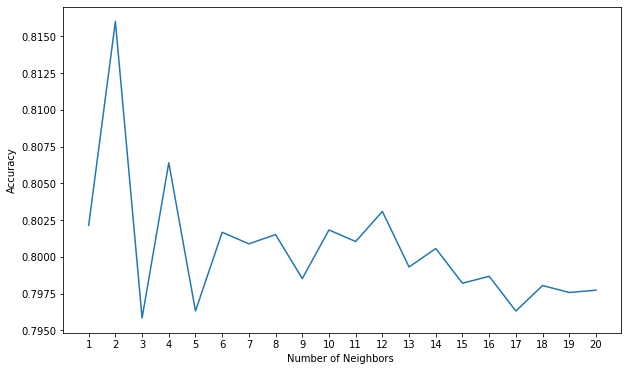

In [113]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [114]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [115]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [116]:
g_res = gs.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


C:\Users\KWAK\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [117]:
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}

In [118]:
knn = KNeighborsClassifier(n_neighbors = 13, weights = 'distance',algorithm = 'brute',metric = 'manhattan')
knn.fit(X_train, y_train)

C:\Users\KWAK\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(algorithm='brute', metric='manhattan', n_neighbors=13,
                     weights='distance')

In [119]:
X_test

,lead_time,avg_price_per_room,weather_Summer,market_segment_type_Online,no_of_adults,required_car_parking_space_0,no_of_week_nights,type_of_meal_plan_Meal Plan 2,no_of_special_requests,arrival_year_2017,weather_Winter,market_segment_type_Corporate,repeated_guest_1,no_of_previous_bookings_not_canceled
3507,27,96.90,0,1,2,1,3,0,2,0,1,0,0,0.0
11253,54,114.63,0,1,2,1,5,0,0,0,0,0,0,0.0
16527,56,120.00,1,0,2,1,1,0,0,0,0,0,0,0.0
3448,22,75.00,0,0,2,1,2,0,1,1,0,0,0,0.0
16491,61,79.36,0,1,2,1,3,0,1,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,12,176.33,0,1,2,1,1,0,0,0,1,0,0,0.0
13845,82,90.95,0,0,2,1,3,0,0,0,0,0,0,0.0
21946,245,75.00,1,1,2,1,2,0,0,0,0,0,0,0.0
18716,36,67.50,1,0,2,1,1,0,2,0,0,0,0,0.0


In [120]:
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)

In [121]:
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn))

Training set accuracy:  0.9923852536498267
Test set accuracy:  0.8442028985507246


In [81]:
x = test_dummy[selected_lst]

x_test= x

# prediction_list= tree.predict(x_test)
# prediction_list= nb_model.predict(x_test)
# prediction_list= lr_model.predict(x_test)
# prediction_list= mlp_model.predict(x_test)
prediction_list= knn.predict(x_test)
submit = pd.read_csv("C:\\Datamining\\sample_submission.csv")
submit["booking_status"] = prediction_list
submit = submit.replace({'Canceled':1, 'Not_Canceled':0})
submit

,Booking_ID,booking_status
0,INN04969,0
1,INN34541,0
2,INN36109,0
3,INN01554,0
4,INN24975,0
...,...,...
10878,INN29686,0
10879,INN01107,0
10880,INN06811,0
10881,INN27777,1


In [82]:
submit.to_csv("C:\\Datamining\\dt_submit3.csv",index=False)

### MLP Classifier

In [123]:
mlp_gs = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
clf.fit(X, y) # X is train samples and y is the corresponding labels

C:\Users\KWAK\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10, 30, 10), (20,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [124]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'adaptive', 'solver': 'adam'}


In [126]:
# multi-layer perceptron 학습/예측/평가
mlp_gs = MLPClassifier(max_iter=100, activation = 'relu', alpha = 0.0001, hidden_layer_sizes= (10, 30, 10), learning_rate ='adaptive', solver= 'adam')
mlp_model.fit(X_train , y_train)
mlp_pred = mlp_model.predict(X_test)
print('MLPClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, mlp_pred)))

C:\Users\KWAK\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier 정확도: 0.8379
